<a href="https://colab.research.google.com/github/Wynn-Y01/MH6812finalProjectGroup4/blob/main/%E2%80%9CH02_Adaptive_Gauss_Integration_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaptive Gauss integration (Homework 02)
In class we studied how to perform standard Gauss integration and local Gauss integration. In this homework we will try to improve the latter.

The local Gauss integration is not fully satisfactory. The reason is that it asks the user to provide the number of splits of the integration domain. However that is a rather technical detail, since the user is only interested in the precision of the numerical method, not the way the numerical method achieves that precision.

We would like to make a program that takes:
- function to integrate
- left limit of integration
- right limit of integration
- desired tolerance

and than decides by itself how many splits are required.

To achieve that we can use a very similar idea to the one we used for adaptive step in Runge-Kutta with step doubling.

The program should
- Integrate with an initial choice of a number of splits
- Integrate with twice as many splits
- Estimate the error (you have to figure out how to estimate the error: use similar ideas as for adaptive step in Runge-Kutta with step doubling)
- Guess a new number of splits to achieve the desired precision (again you have to figure out how to do that: use similar ideas as for adaptive step in Runge-Kutta with step doubling)
- Try the new number of splits and if the desired accuracy has been reached output the result, otherwise repeat the strategy above until the accuracy is reached

Use the fact that local Gauss quadrature has an order of convergence which is 2 times its order.

Notice, you are free to use the programs that we developed in class.

In [ ]:
import numpy as np

def gauss_integrate(functToIntegr, xmin, xmax, order):
    """
    使用高斯求积计算 f 在 [xmin, xmax] 之间的积分。
    """
    if order < 1:
        raise ValueError("The order of Gauss Integration must be positive")
    if order > 5:
        raise NotImplementedError("The maximum implemented order for Gauss Integration is 5")

    # 高斯求积点与权重
    xGauss = [np.array([0.0]),
              np.array([-0.577350269189625, 0.577350269189625]),
              np.array([-0.7745966692414834, 0.0, 0.7745966692414834]),
              np.array([-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]),
              np.array([-0.9061798459386640, -0.5384693101056831, 0.0, 0.5384693101056831, 0.9061798459386640])]

    wGauss = [np.array([2.0]),
              np.array([1.0000000000000000, 1.0000000000000000]),
              np.array([0.5555555555555556, 0.8888888888888888, 0.5555555555555556]),
              np.array([0.3478548451374538, 0.6521451548625461, 0.6521451548625461, 0.3478548451374538]),
              np.array([0.2369268850561891, 0.4786286704993665, 0.5688888888888889, 0.4786286704993665, 0.2369268850561891])]

    # 变换积分区间
    return (xmax - xmin) / 2.0 * np.sum(wGauss[order-1] * functToIntegr((xmin + xmax) / 2.0 + xGauss[order-1] * (xmax - xmin) / 2.0))
def adaptiveGaussIntegration(functToIntegr, xmin, xmax, order, tolerance, maxSplitNumber=100):
    """
    使用自适应高斯积分计算数值积分，并输出每次迭代的信息。
    """
    def Adaptive_integrate(functToIntegr, xmin, xmax, order, tolerance, depth=0):
        I1 = gauss_integrate(functToIntegr, xmin, xmax, order)  # 单次高斯积分
        mid = (xmin + xmax) / 2
        I2 = (gauss_integrate(functToIntegr, xmin, mid, order) +
              gauss_integrate(functToIntegr, mid, xmax, order))  # 两次高斯积分

        error = abs(I1 - I2)

        # 记录当前迭代的信息
        print(f"depth: {depth}: Splits={2 ** depth}, Integral={I2:.6f}, Error={error:.2e}")

        if error < tolerance or depth >= maxSplitNumber:
            return I2
        else:
            return (Adaptive_integrate(functToIntegr, xmin, mid, order, tolerance, depth + 1) +
                    Adaptive_integrate(functToIntegr, mid, xmax, order, tolerance, depth + 1))

    # 计算最终积分值
    integral = Adaptive_integrate(functToIntegr, xmin, xmax, order, tolerance)
    return integral


Now test your result. Try to integrate

\begin{equation}
    \int_0^{100} \sin(x) dx
\end{equation}

The exact result is

0.1376811277123160658980614860491574644899159914644891707198378873072789119490733758969048943157227149

Print the difference between your result and the exact solution. Is the difference similar to the tolerance you set?

In [ ]:
adaptiveGaussIntegration(lambda x: np.sin(x), 0, 100, 5, 1.e-10)-0.13768112771231606589806148604915746448991599146448917071983788730727

depth: 0: Splits=1, Integral=-10.325099, Error=4.10e+00
depth: 1: Splits=2, Integral=-5.236559, Error=2.61e+00
depth: 2: Splits=4, Integral=-0.017643, Error=1.30e+00
depth: 3: Splits=8, Integral=0.002214, Error=6.63e-03
depth: 4: Splits=16, Integral=0.000551, Error=3.04e-06
depth: 5: Splits=32, Integral=1.999862, Error=1.04e-07
depth: 6: Splits=64, Integral=0.991704, Error=3.71e-11
depth: 6: Splits=64, Integral=1.008159, Error=3.78e-11
depth: 5: Splits=32, Integral=-1.999312, Error=1.04e-07
depth: 6: Splits=64, Integral=-0.974976, Error=3.65e-11
depth: 6: Splits=64, Integral=-1.024336, Error=3.84e-11
depth: 4: Splits=16, Integral=0.001651, Error=9.11e-06
depth: 5: Splits=32, Integral=1.998211, Error=1.04e-07
depth: 6: Splits=64, Integral=0.957980, Error=3.59e-11
depth: 6: Splits=64, Integral=1.040231, Error=3.90e-11
depth: 5: Splits=32, Integral=-1.996560, Error=1.04e-07
depth: 6: Splits=64, Integral=-0.940720, Error=3.52e-11
depth: 6: Splits=64, Integral=-1.055840, Error=3.95e-11
dept

5.2735593669694936e-15

# Locally adaptive grid with Gauss integration [Difficult! NOT GRADED!!]

This part is **considerably more difficult** than the previous one.
This will **not be graded**. Also be careful as, depending on how good you are in programming, it might require a lot of time. It also requires using recursion. This part is provided only for students who want an extra challenge and have the time to face it.

When integrating, it turns out that not all the parts of a function are equally difficult to integrate. It is intuitive to imagine that if a function is relatively smooth on some part of the domain, it should be easy to integrate, while parts where it changes very rapidly should give more troubles to our numerical algorithm.

Look for instance at this integral

\begin{equation}
    \int_0^{5} \sin(x^2)
\end{equation}

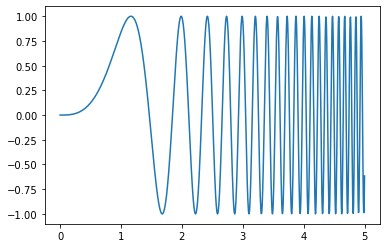

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,1000)
plt.plot(x, np.sin(x**3));

The regions close to 0 should be relatively easy to integrate, while as we move to larger x, the function oscillates more and more wildly, and should require higher precision.

We can use our local Gauss integration with a very large number of splits. However that becomes very wasteful at small x, where a rather coarse mesh should be sufficient.

We need to split our integral in pieces

\begin{equation}
    \int_0^{5} \sin(x^2) = \int_0^{x_1} \sin(x^2) + \int_{x_1}^{x_2} \sin(x^2) + \int_{x_2}^{x_3} \sin(x^2) + ...
\end{equation}

but where the early pieces are larger, and later pieces are smaller.

The choice of how to split the integration domain could be done by hand for the function above, but again that is a rather unsatisfactory solution since that is not general. Moreover it is not automatic, and requires a lot of human time.

We here want to construct a method that locally refines the mesh, but only where needed.

The idea is to split the integration domain in 2 elements, use the idea above to estimate the error. If the error is not satisfying, the two integrals over the two elements are attempted separately.
For each one of them, the error is computed and for each one of them a decision is taken as to whether one needs to split further, and so on and so forth. Notice, one should keep splitting only the part of the domain over which the error is not acceptable.

The easiest way to implement the algorithm above is by using recursion.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 高斯积分方法（假设有 gauss_integrate 函数）
def gauss_integrate(f, a, b, order=5):
    """计算区间 [a,b] 上的高斯积分"""
    x, w = np.polynomial.legendre.leggauss(order)
    x_mapped = 0.5 * (b - a) * x + 0.5 * (a + b)
    return 0.5 * (b - a) * np.sum(w * f(x_mapped))

# 生成训练数据
def generate_data(n_samples=1000, n_points=50):
    X, Y = [], []
    for _ in range(n_samples):
        a, b = np.random.uniform(0, 10, 2)  # 随机区间
        if a > b: a, b = b, a
        f = lambda x: np.sin(x**2)  # 振荡函数
        integral_full = gauss_integrate(f, a, b, order=5)

        # 计算分裂误差
        mid = (a + b) / 2
        integral_split = (gauss_integrate(f, a, mid, order=5) +
                          gauss_integrate(f, mid, b, order=5))
        error = abs(integral_full - integral_split)

        # 取样区间内的 f(x) 作为 CNN 输入
        x_values = np.linspace(a, b, n_points)
        f_values = f(x_values)

        X.append(f_values)
        Y.append(1 if error > 0.01 else 0)  # 误差大于阈值则细分
    return np.array(X), np.array(Y)

# 生成数据
X_data, Y_data = generate_data()
X_tensor = torch.tensor(X_data, dtype=torch.float32)
Y_tensor = torch.tensor(Y_data, dtype=torch.float32).unsqueeze(1)

# 创建数据集
dataset = TensorDataset(X_tensor, Y_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


In [ ]:
class AdaptiveIntegrationCNN(nn.Module):
    def __init__(self):
        super(AdaptiveIntegrationCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(32 * 25, 64)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1)  # (batch, 1, n_points)
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x


In [ ]:
# 创建模型
model = AdaptiveIntegrationCNN()
criterion = nn.BCELoss()  # 适用于二分类
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练过程
n_epochs = 10
for epoch in range(n_epochs):
    for batch in dataloader:
        X_batch, Y_batch = batch
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.6f}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x384 and 800x64)

In [ ]:
def adaptive_gauss_integrate_cnn(f, a, b, order=5, tolerance=0.01, depth=0, max_depth=10):
    """ 使用 CNN 预测是否需要细分积分区间 """
    if depth >= max_depth:
        return gauss_integrate(f, a, b, order)

    # 计算当前区间的 f(x) 作为 CNN 输入
    x_values = np.linspace(a, b, 50)
    f_values = f(x_values)
    input_tensor = torch.tensor(f_values, dtype=torch.float32).unsqueeze(0)

    # 让 CNN 预测是否细分
    with torch.no_grad():
        decision = model(input_tensor).item()

    if decision < 0.5:  # CNN 预测无需细分
        return gauss_integrate(f, a, b, order)

    # CNN 认为需要细分，则递归计算
    mid = (a + b) / 2
    return (adaptive_gauss_integrate_cnn(f, a, mid, order, tolerance, depth + 1, max_depth) +
            adaptive_gauss_integrate_cnn(f, mid, b, order, tolerance, depth + 1, max_depth))

# 测试
f = lambda x: np.sin(x**2)
result = adaptive_gauss_integrate_cnn(f, 0, 10)
print(f"Adaptive Integral: {result:.6f}")


The approach above can be improved.

How do you test the error for each integral? Do you always compare to the tolerance? If so, the total error will not be comparable to the tolerance, but larger than that, since all the errors will accumulate over all the elements when you sum all the contributions to the integral. Can you figure out a way to make it more consistent?